In [199]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Plotly Data Visualization Libraries
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import math
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# Activate inline plotting in notebook
py.init_notebook_mode(connected = False)

In [249]:
listings = pd.read_csv("seattle/listings.csv")
listings

id                            listing_url     scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  2.020000e+13   
1       953595    https://www.airbnb.com/rooms/953595  2.020000e+13   
2      3308979   https://www.airbnb.com/rooms/3308979  2.020000e+13   
3      7421966   https://www.airbnb.com/rooms/7421966  2.020000e+13   
4       278830    https://www.airbnb.com/rooms/278830  2.020000e+13   
...        ...                                    ...           ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  2.020000e+13   
3814   8902327   https://www.airbnb.com/rooms/8902327  2.020000e+13   
3815  10267360  https://www.airbnb.com/rooms/10267360  2.020000e+13   
3816   9604740   https://www.airbnb.com/rooms/9604740  2.020000e+13   
3817  10208623  https://www.airbnb.com/rooms/10208623  2.020000e+13   

     last_scraped                                 name  \
0          4/1/16         Stylish Queen Anne Apartment   
1          4/1/16   Bright & Airy Queen Anne Apartment   
2          4/1/16  New Modern House-Amazing water view   
3          4/1/16                   Queen Anne Chateau   
4          4/1/16       Charming craftsman 3 bdm house   
...           ...                                  ...   
3813       4/1/16   3BR Mountain View House in Seattle   
3814       4/1/16    Portage Bay View!-One Bedroom Apt   
3815       4/1/16    Private apartment view of Lake WA   
3816       4/1/16    Amazing View with Modern Comfort!   
3817       4/1/16            Large Lakefront Apartment   

                                                summary  \
0                                                   NaN   
1     Chemically sensitive? We've removed the irrita...   
2     New modern house built in 2013.  Spectacular s...   
3     A charming apartment that sits atop Queen Anne...   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...   
3814  800 square foot 1 bedroom basement apartment w...   
3815  Very comfortable lower unit. Quiet, charming m...   
3816  Cozy studio condo in the heart on Madison Park...   
3817  All hardwood floors, fireplace, 65" TV with Xb...   

                                                  space  \
0     Make your self at home in this charming one-be...   
1     Beautiful, hypoallergenic apartment in an extr...   
2     Our house is modern, light and fresh with a wa...   
3                                                   NaN   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house bright, stylish, and wheelch...   
3814  This space has a great view of Portage Bay wit...   
3815                                                NaN   
3816  Fully furnished unit to accommodate most needs...   
3817                                                NaN   

                                            description experiences_offered  \
0     Make your self at home in this charming one-be...                none   
1     Chemically sensitive? We've removed the irrita...                none   
2     New modern house built in 2013.  Spectacular s...                none   
3     A charming apartment that sits atop Queen Anne...                none   
4     Cozy family craftman house in beautiful neighb...                none   
...                                                 ...                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...                none   
3814  800 square foot 1 bedroom basement apartment w...                none   
3815  Very comfortable lower unit. Quiet, charming m...                none   
3816  Cozy studio condo in the heart on Madison Park...                none   
3817  All hardwood floors, fireplace, 65" TV with Xb...                none   

                                  neighborhood_overview  ...  \
0                              

In [204]:
missingData = (listings.isnull().sum())/len(listings)
missingData

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 92, dtype: float64

In [205]:
missingData_over50 = listings.columns[missingData > 0.5]
listings = listings.drop(missingData_over50, axis = 1)

In [206]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [207]:
predictors = listings[['price', 'number_of_reviews', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'review_scores_rating']]

In [208]:
predictors.dtypes

price                    object
number_of_reviews         int64
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
cleaning_fee             object
review_scores_rating    float64
dtype: object

In [209]:
predictors['price'] = predictors.price.str.replace('$',' ').str.replace(',','').astype('float64')
predictors['cleaning_fee'] = predictors.cleaning_fee.str.replace('$',' ').str.replace(',','').astype('float64')

In [210]:
predictors.dtypes

price                   float64
number_of_reviews         int64
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
cleaning_fee            float64
review_scores_rating    float64
dtype: object

In [211]:
predictors = predictors.dropna()

In [212]:
predictors.isnull().sum()

price                   0
number_of_reviews       0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
cleaning_fee            0
review_scores_rating    0
dtype: int64

In [213]:
predictors.shape

(2398, 8)

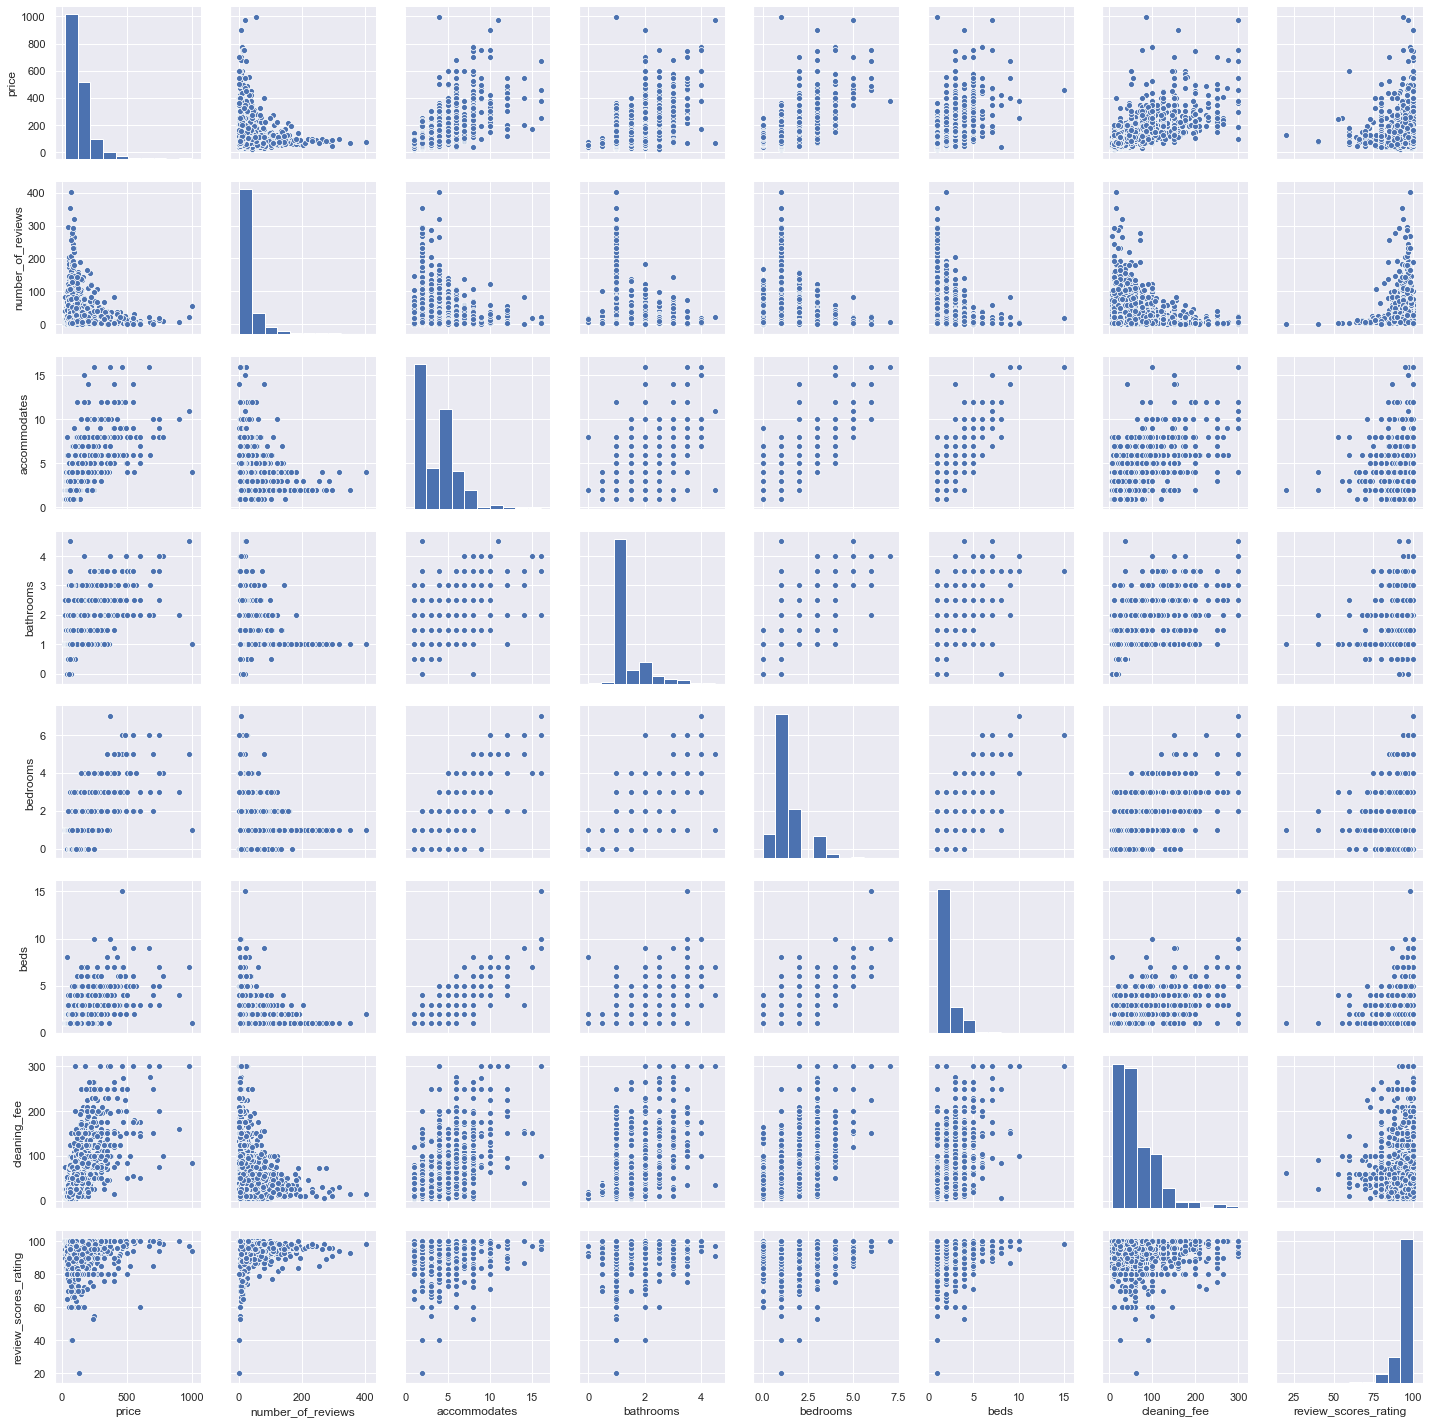

In [214]:
sb.pairplot(data = predictors)

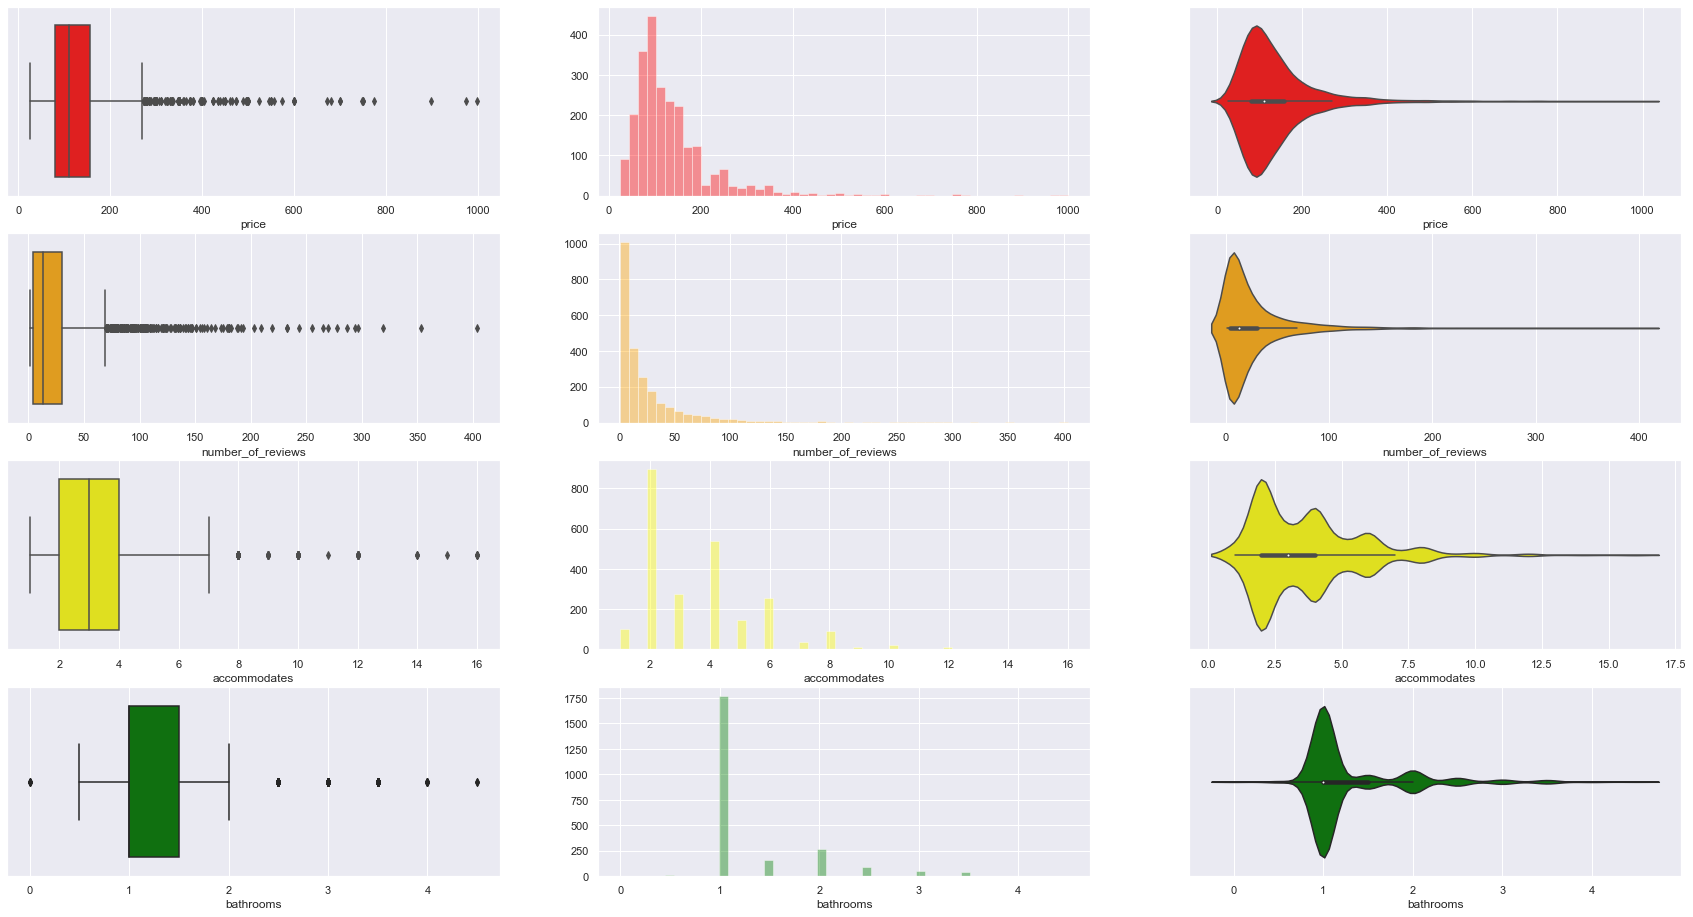

In [215]:
variable = ['price', 'number_of_reviews', 'accommodates', 'bathrooms']
colour = ['red', 'orange', 'yellow', 'green']

f, axes = plt.subplots(4, 3, figsize=(30, 16))
for var in range (4):
    sb.boxplot(predictors[variable[var]], orient = "h", color = colour[var], ax = axes[var][0])
    sb.distplot(predictors[variable[var]], kde = False, color = colour[var], ax = axes[var][1])
    sb.violinplot(predictors[variable[var]], color = colour[var] , ax = axes[var][2])

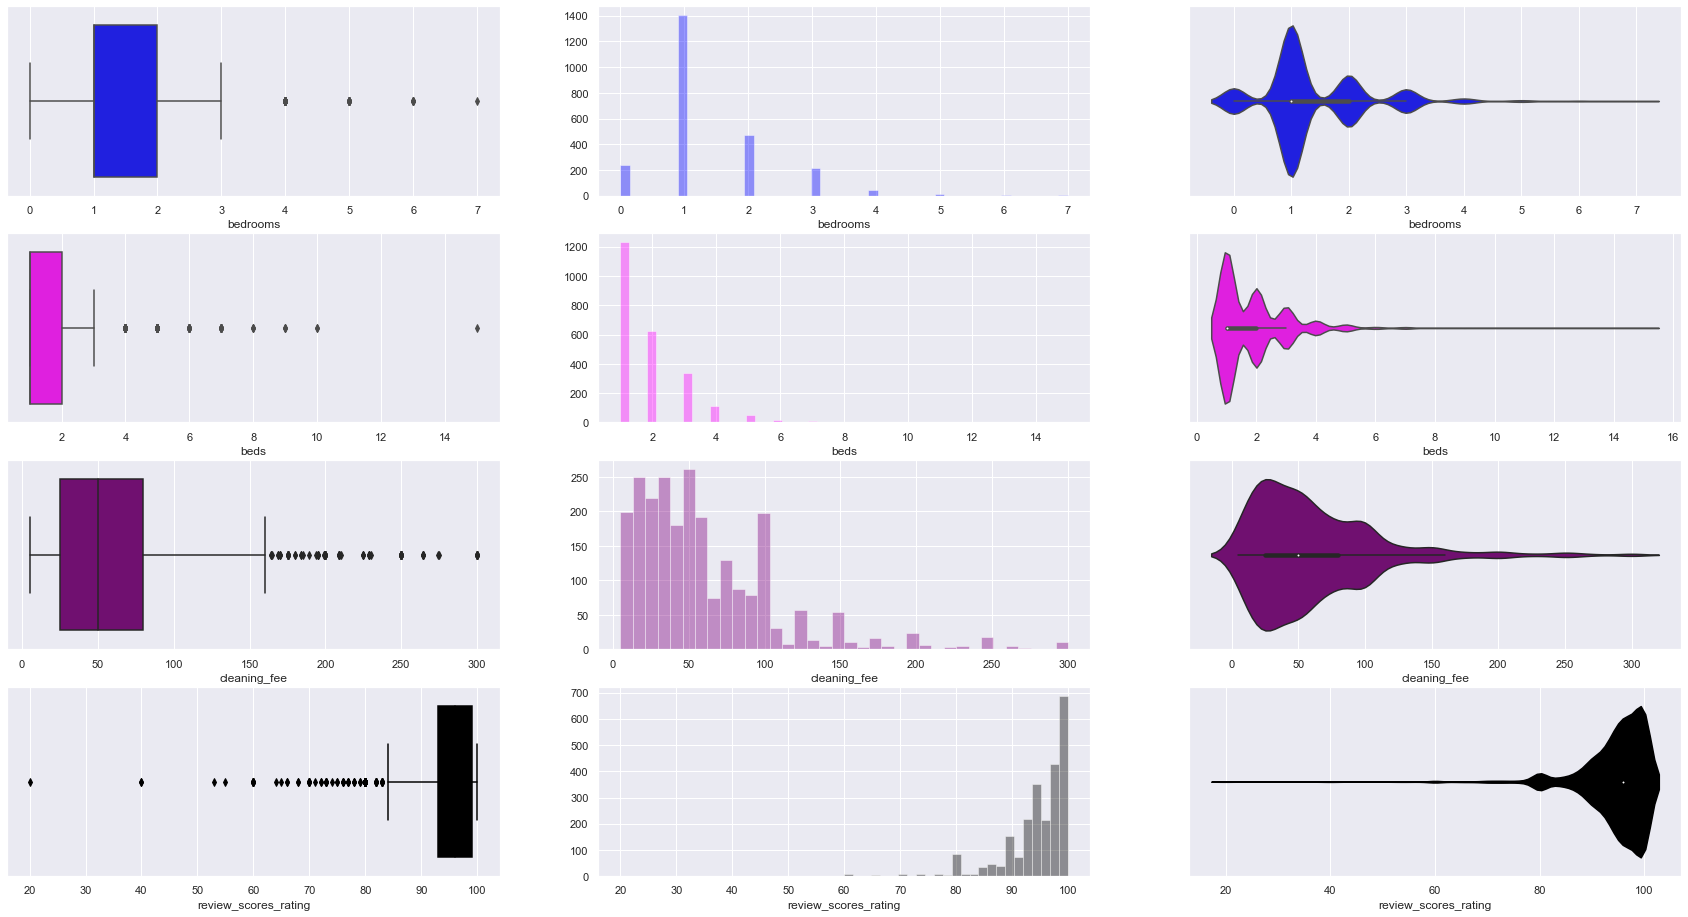

In [216]:
variable = ['bedrooms', 'beds', 'cleaning_fee', 'review_scores_rating']
colour = ['blue', 'magenta', 'purple', 'black']

f, axes = plt.subplots(4, 3, figsize=(30, 16))
for var in range (4):
    sb.boxplot(predictors[variable[var]], orient = "h", color = colour[var], ax = axes[var][0])
    sb.distplot(predictors[variable[var]], kde = False, color = colour[var], ax = axes[var][1])
    sb.violinplot(predictors[variable[var]], color = colour[var] , ax = axes[var][2])

26.397589008033716
64.59145534372979
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	:  0.9200009713709641



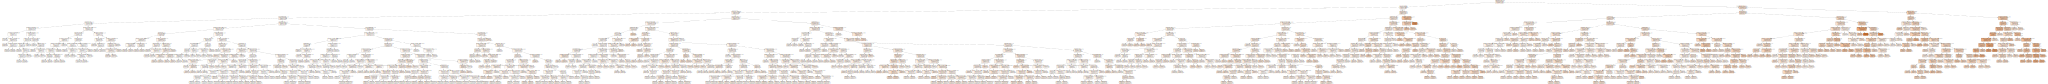

In [217]:
l_X, l_y = predictors.drop('price', axis=1), predictors['price'];
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.33, random_state=1024);

randomForest = RandomForestRegressor(n_estimators=50, criterion='mse', random_state=1024, max_depth = 15);
randomForest.fit(l_X_train, l_y_train)

estimator = randomForest.estimators_[0]

l_y_pred = randomForest.predict(l_X_test);
l_y_pred_tr = randomForest.predict(l_X_train);

print(math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t: ", randomForest.score(l_X_train, l_y_train))
print()

treedot = export_graphviz(estimator,                                      
                          feature_names = l_X_train.columns,          
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                               
                          special_characters = True)                    

import graphviz
graphviz.Source(treedot)

In [230]:
l_X_train

number_of_reviews  accommodates  bathrooms  bedrooms  beds  \
2473                 15             6        1.0       1.0   2.0   
2331                  1             6        2.0       3.0   4.0   
3627                 25             2        1.0       0.0   2.0   
3306                 23             4        1.0       2.0   2.0   
861                 136             2        1.5       1.0   1.0   
...                 ...           ...        ...       ...   ...   
3588                 14             6        2.0       2.0   3.0   
1305                  4             2        1.0       1.0   1.0   
906                   4             6        2.0       2.0   2.0   
1362                 10             6        2.0       2.0   3.0   
3068                 18             2        1.0       1.0   1.0   

      cleaning_fee  review_scores_rating  
2473          70.0                  87.0  
2331         100.0                  80.0  
3627          50.0                  98.0  
3306          30.0                  99.0  
861           15.0                  97.0  
...            ...                   ...  
3588          95.0                 100.0  
1305          20.0                  85.0  
906          100.0                  95.0  
1362         113.0                 100.0  
3068         125.0                  98.0  

[1606 rows x 7 columns]

In [246]:
y_train_DF = pd.DataFrame(l_y_train)
y_train_DF = y_train_DF.reset_index()
y_train_DF

index  price
0      2473  115.0
1      2331  250.0
2      3627   90.0
3      3306  119.0
4       861   70.0
...     ...    ...
1601   3588  250.0
1602   1305  117.0
1603    906  160.0
1604   1362  195.0
1605   3068  135.0

[1606 rows x 2 columns]

In [254]:
y_trainpred_DF = pd.DataFrame(l_y_pred_tr)
y_trainpred_DF.rename(columns = {0: 'predprice'}, inplace = True)
y_trainpred_DF

predprice
0     116.836815
1     238.223000
2      98.062676
3     118.368148
4      74.102618
...          ...
1601  250.189000
1602   97.559106
1603  172.957778
1604  207.500000
1605  139.140296

[1606 rows x 1 columns]

In [255]:
jointDF = pd.concat([y_train_DF, y_trainpred_DF.reindex(index=y_train_DF.index)], sort = False, axis = 1)
jointDF

index  price   predprice
0      2473  115.0  116.836815
1      2331  250.0  238.223000
2      3627   90.0   98.062676
3      3306  119.0  118.368148
4       861   70.0   74.102618
...     ...    ...         ...
1601   3588  250.0  250.189000
1602   1305  117.0   97.559106
1603    906  160.0  172.957778
1604   1362  195.0  207.500000
1605   3068  135.0  139.140296

[1606 rows x 3 columns]